<a href="https://colab.research.google.com/github/Tabianoo/Python-practice/blob/main/09_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Supervised Learning models
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,  VotingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

# Unsupervised Learning models
from sklearn.cluster import KMeans, DBSCAN

# Regularization, Estimator
from sklearn.linear_model import Lasso,ElasticNet,Ridge
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV
from sklearn.metrics import mean_squared_log_error # RMSLE
from sklearn.metrics import mean_squared_error # RMSE

# Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Scaler, Encoder, Regulariation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

- Cluster : Gather similar samples. (ex. applied in RecSys, Ranking, Semi-supervised learning, Dimension reduction) Basic model : k-means, DBSCAN
- Detect outlier : Find error. (ex. Upcoming trend in time series, faulty unit)
- Density prediction : Predict PDF(Probability Density Function). It is useful in data analysis and visualization

# K-means algorithm

Process of k-means
1. Select k random point as cluster center
2. Change the cluter center to the average of its assigned points
3. Iteration until center(average,cluster) is not moved


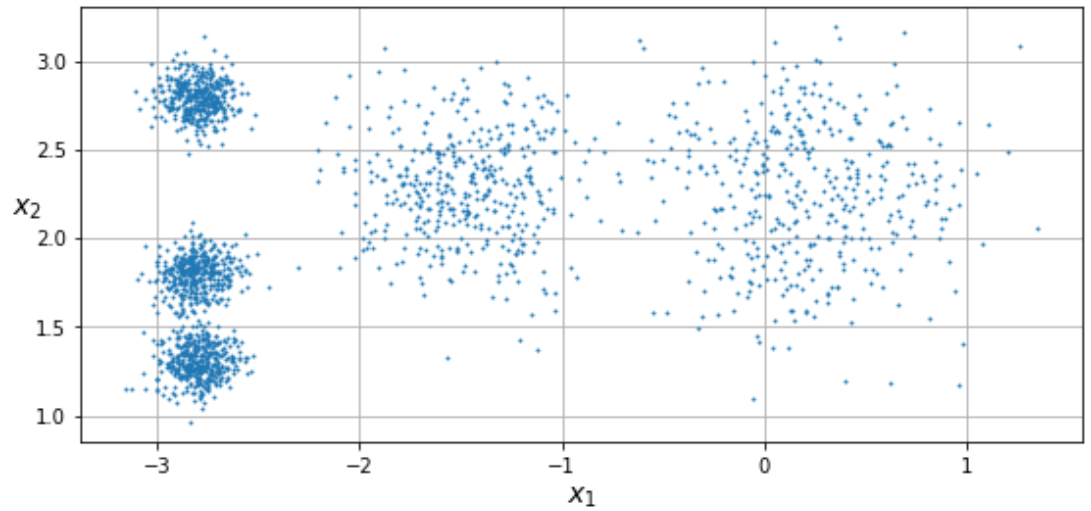

In [ ]:
# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

In [ ]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_ # Check centroid points

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

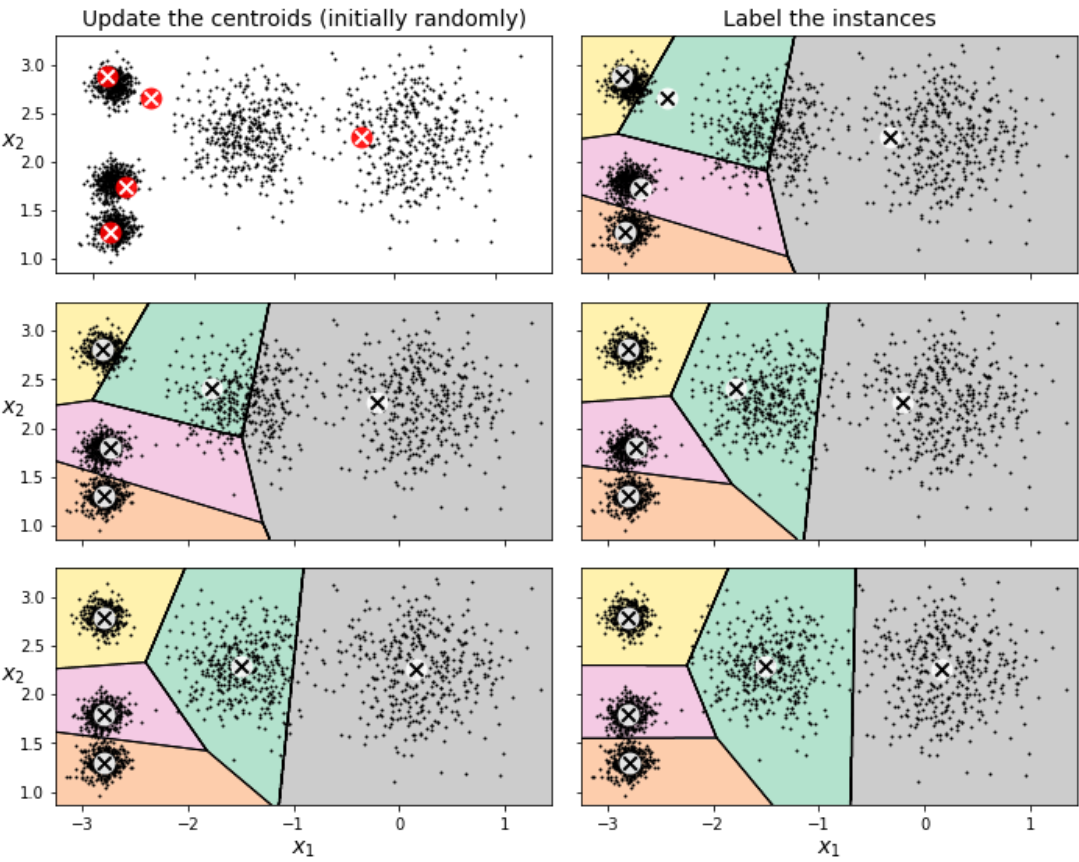

- 'init=good_init' : Train and reset center times -> Get only the best model
- Elbow method : Way to choosing the optimum number of clusters. But it is too abstract
- Silhouette score[(b - a) / max(a, b)] : Solution for Elbow.
a is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and b is the mean nearest-cluster distance

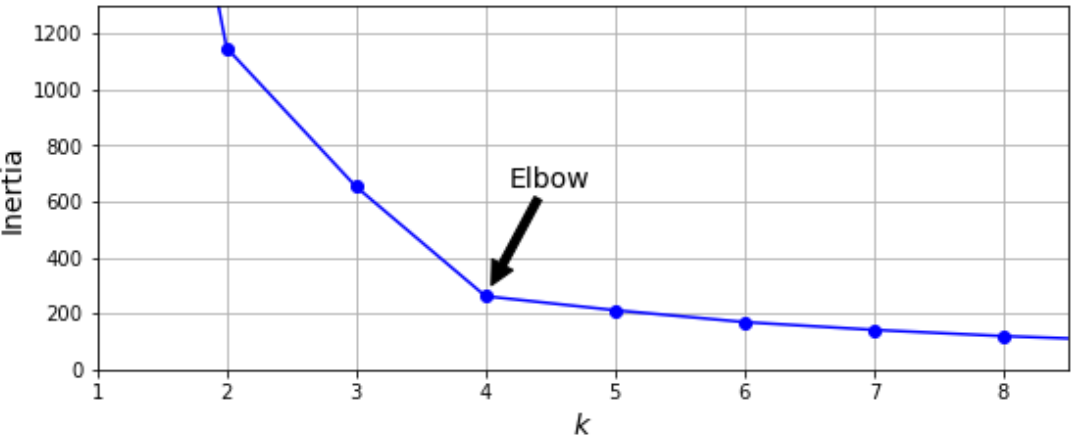

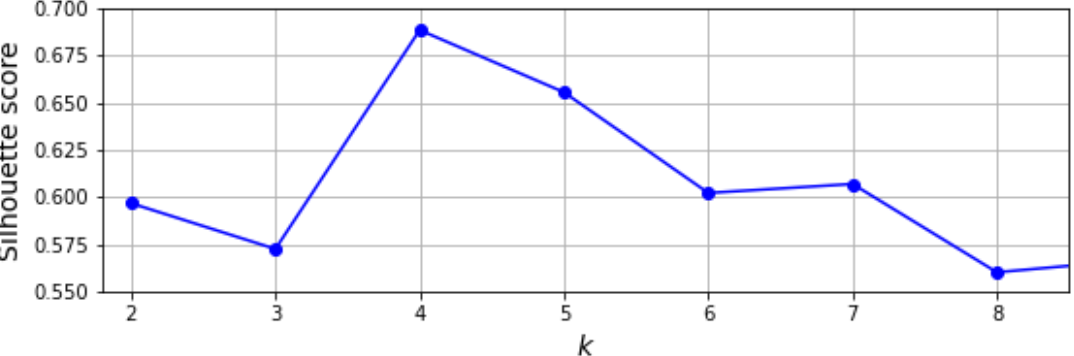

Limits of k-means
- K-means struggles to cluster it correctly
- It doesn't work well when cluster's shape is circle or oval.

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN algorithm process
1. Count how many samples are near(<ε)
2. Define **core instance** when it is more than min_sample
3. Samples in same core insatnce are same cluster. Neighbors expand its cluster constantly.

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [ ]:
dbscan.labels_[:10] # -1 value means outlier

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [ ]:
dbscan.core_sample_indices_ # Sample's index

array([  0,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  29,  30,  31,
        32,  33,  34,  36,  38,  39,  41,  42,  44,  45,  47,  49,  50,
        51,  52,  53,  54,  55,  56,  58,  59,  61,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  83,  84,  85,  87,  88,  89,  90,  91,  93,  94,  96,
        97,  98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114,
       115, 116, 117, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 135, 136, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149,
       150, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178,
       179, 181, 182, 183, 185, 186, 187, 188, 189, 191, 193, 194, 195,
       196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 22

In [ ]:
dbscan.components_ # Core sample

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

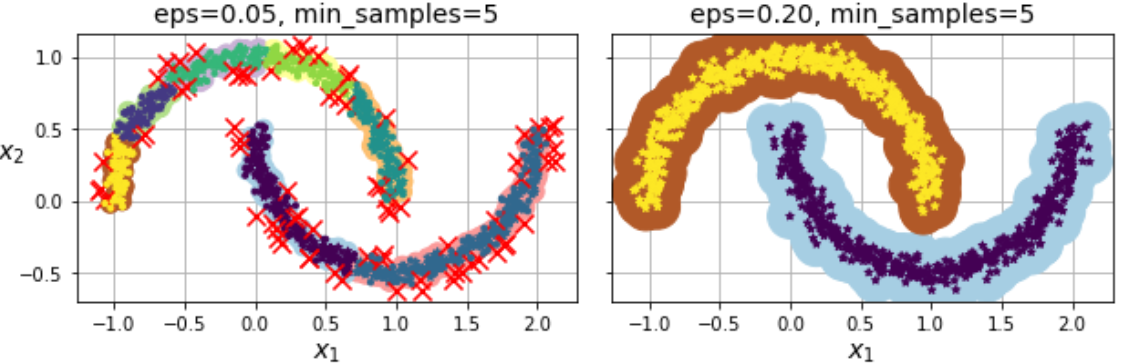
- 'eps' means small length for near units
- DBSCAN doesn't use predict. So user should select predictor (ex. KNeighborsClassifier)

- pros) DBSCAN doesn't effected by cluster's number or shape.
- cons) It doesn't work well when cluster's density gap is too high or low-density area doesn't exist
- More algorithms : Spectral Clustering, Agglomerative Clustering

# GMM (Gaussian Mixture Model)

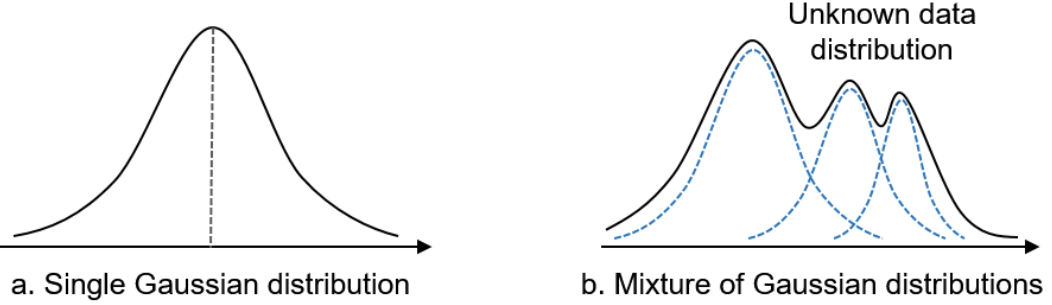
- GMM suppose cluster is similar to mixed gaussian distribution.
- Because of that, cluster's shape is usually oval.
- 'score_samples()' : Calculate model's density

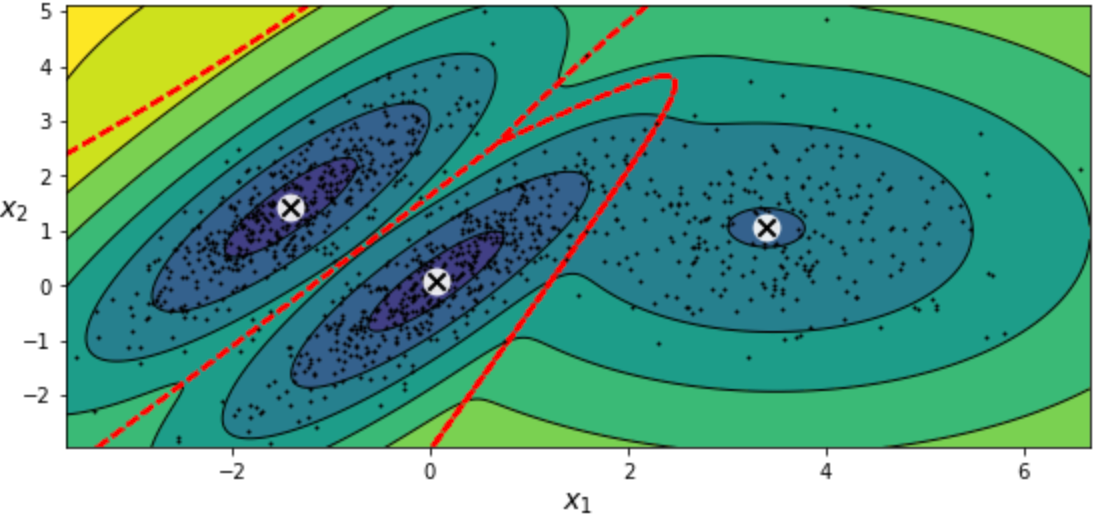
- 'cnvariance_type' : Restrict covar matrix (spherical, diag, tie)
- Outlier : All samples in **low-density**(defined by user) area can be outlier.

Cluster's number selection in GMM
-  K-mean's way(Silhouette score) doesn't work when cluster's shape is oval or density isn't continous
- Lower BIC, AIC score model means better GMM model

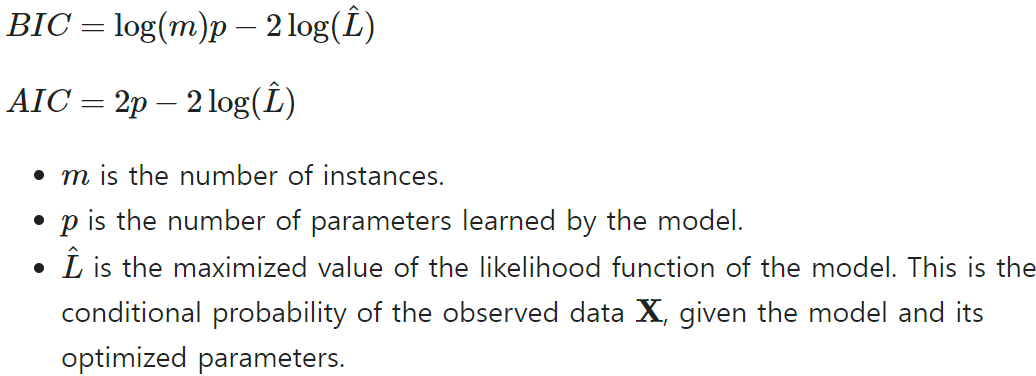

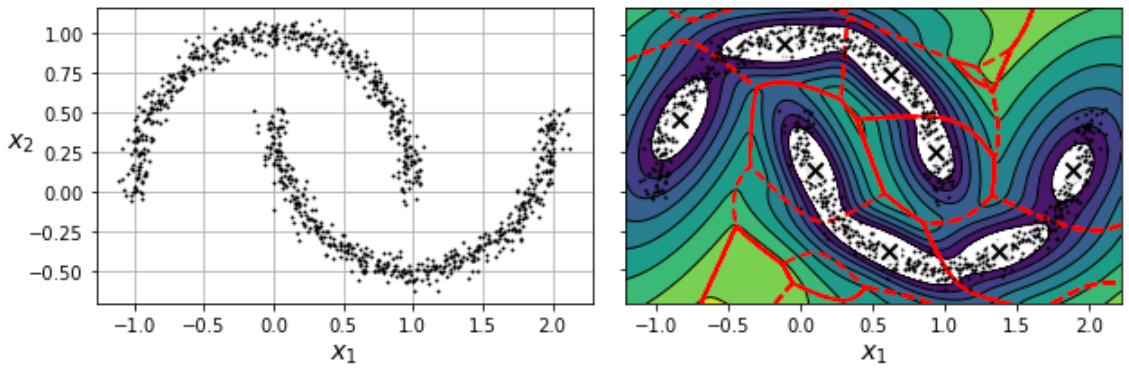
- GMM does not work well when cluster's shape is not oval